### Problem- 1A

#### Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

#### [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
df=pd.read_csv('SalaryData.csv')

In [3]:
df.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [4]:
df.shape

(40, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
df.describe(include='all')

Education       Occupation         Salary
count           40               40      40.000000
unique           3                4            NaN
top      Doctorate   Prof-specialty            NaN
freq            16               13            NaN
mean           NaN              NaN  162186.875000
std            NaN              NaN   64860.407506
min            NaN              NaN   50103.000000
25%            NaN              NaN   99897.500000
50%            NaN              NaN  169100.000000
75%            NaN              NaN  214440.750000
max            NaN              NaN  260151.000000

In [7]:
df.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [8]:
df['Education'].value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [9]:
df['Occupation'].value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

#### 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

Null Hypothesis $H_0$: The mean salary is the same with respect to all the 3 categories of education.(Doctorate, Bachelors, HS-Grad)                                                                                                                                               
Alternate Hypothesis $H_a$: The mean salary is different in at least one category of education.

#### 1.2 Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [22]:
formula ='Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table1 = anova_lm(model)
print(aov_table1)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [23]:
aov_table1

df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN

#### Since the p value is less than the significance level (0.05), we can reject the null hypothesis and conclude that there is a difference in the mean salaries for at-least one category of education.

#### 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

Null Hypothesis $H_0$: The mean salary is the same with respect to all the 4 categories of occupation.(Prof-specialty, Sales, Adm-clerical, Exec-managerial)                                              
Alternate Hypothesis $H_a$: The mean salary is different in at least one category of occupation.

#### 1.3 Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [24]:
formula ='Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table2 = anova_lm(model)
print(aov_table2)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


In [25]:
aov_table2

df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN

#### Since the p value is greater than the significance level (0.05), we fail to reject the null hypothesis (we accept $H_0$) and conclude that there is no difference in the mean salaries across the 4 categories of occupation.

#### 1.4 If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

In [14]:
mc_result1 = pairwise_tukeyhsd(endog=df['Salary'], groups= df['Education'], alpha=0.05)
print(mc_result1)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7537.2745  79010.8589   True
 Bachelors    HS-grad  -90114.1556    0.0 -132039.7353 -48188.5758   True
 Doctorate    HS-grad -133388.2222    0.0 -174819.5736 -91956.8709   True
-------------------------------------------------------------------------


In [15]:
mc_result2 = pairwise_tukeyhsd(endog=df['Salary'], groups= df['Occupation'], alpha=0.05)
print(mc_result2)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4133  -40414.1768 151800.7768  False
    Adm-clerical   Prof-specialty  27528.8538 0.7478  -46276.6569 101334.3646  False
    Adm-clerical            Sales  16180.1167 0.9374  -58950.5539  91310.7873  False
 Exec-managerial   Prof-specialty -28164.4462 0.8439 -120501.5231  64172.6308  False
 Exec-managerial            Sales -39513.1833  0.668 -132912.8623  53886.4956  False
  Prof-specialty            Sales -11348.7372  0.972  -81591.9315  58894.4572  False
------------------------------------------------------------------------------------


### Problem- 1B

#### 1.5 What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot. [hint: use the ‘pointplot’ function from the ‘seaborn’ function]

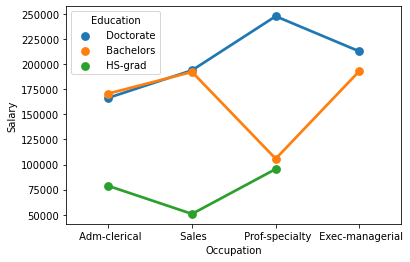

In [17]:
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education', ci=None);

#### 1.6 Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

𝐻0 : The mean salary variable with respect to each education category and occupation is equal.

𝐻1 : At least one of the means of 'salary' variable with respect to each education category and occupation is unequal.

In [26]:
formula = 'Salary ~ C(Education) + C(Occupation)+ C(Education): C(Occupation)'
model = ols(formula, df).fit()
aov_table3 = anova_lm(model)
print(aov_table3)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


In [27]:
aov_table3

df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN

#### As p value = 2.232500e-05 is lesser than 0.05, we reject the null hypothesis and this implies that there is significant amount of interaction between the variables, Education and Occupation and hence, at least one of the means of the salary variable with respect to each education category and occupation is unequal.

#### 1.7 Explain the business implications of performing ANOVA for this particular case study.

### Problem- 2

#### The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.



In [3]:
df1= pd.read_csv('Education+-+Post+12th+Standard.csv')

In [30]:
df1.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [31]:
df1.tail()

Names   Apps  Accept  Enroll  Top10perc  \
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99

In [32]:
df1.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [33]:
df1.shape

(777, 18)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [35]:
df1.isnull().sum() 

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [36]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [37]:
df1.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

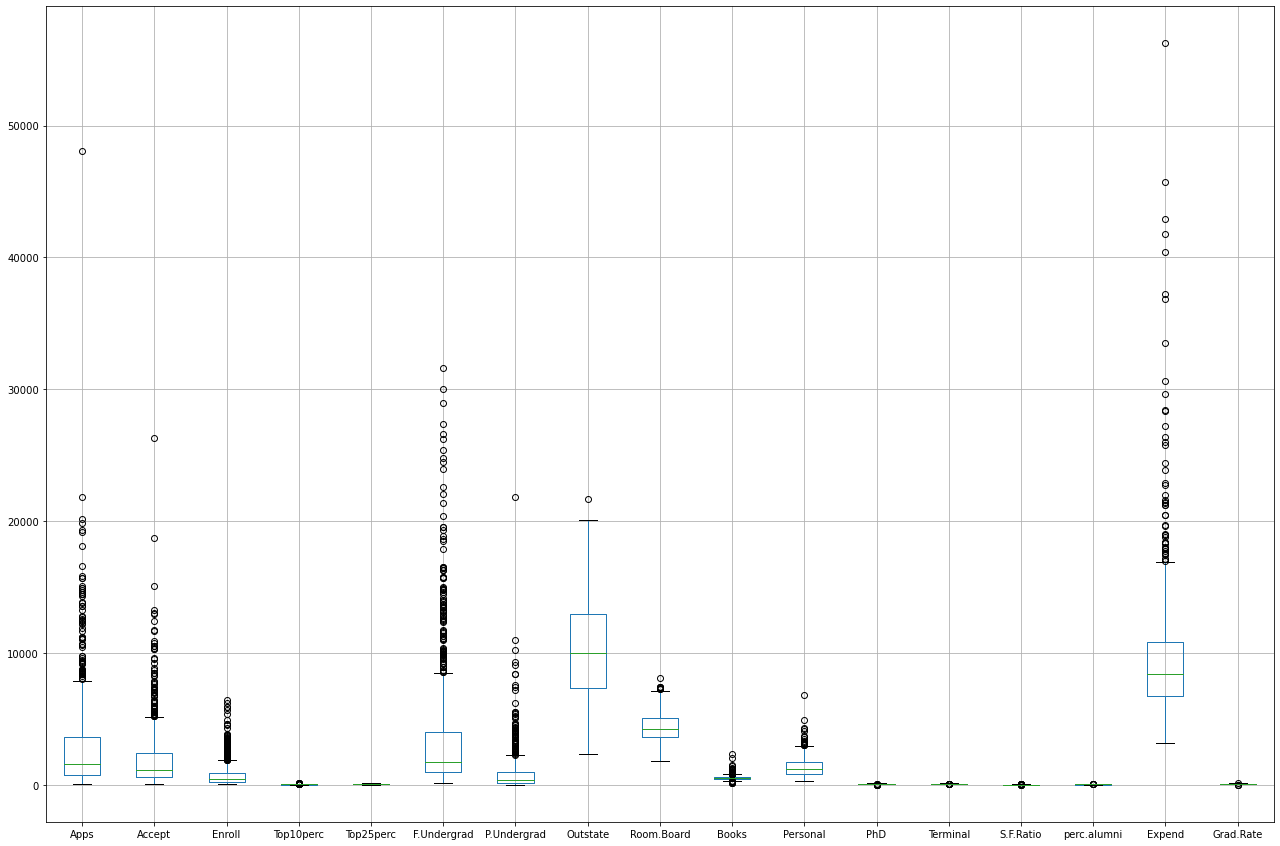

In [12]:
df1.boxplot(figsize=(22,15));

In [40]:
df1.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [16]:
df1.rename(columns = {'F.Undergrad':'F_Undergrad', 'P.Undergrad':'P_Undergrad','Room.Board':'Room_Board',
                      'S.F.Ratio':'SF_Ratio','perc.alumni':'perc_alumni','Grad.Rate':'Grad_Rate'}, inplace = True)

In [51]:
df1.Top10perc.unique()

array([23, 16, 22, 60, 38, 17, 37, 30, 21, 44,  9, 83, 19, 14, 24, 25, 20,
       46, 12, 36, 42, 15, 50, 53, 18, 34, 39, 28, 26, 11, 67, 45, 76,  5,
       48, 10, 87, 71, 49, 32, 40,  8, 47, 29, 75, 27, 13, 35,  1, 31,  6,
       55, 33,  3, 58, 70, 68, 56, 78, 77, 41,  4, 90, 43, 51, 89,  7, 57,
       95, 52, 96,  2, 65, 85, 86, 62, 54, 66, 79, 74, 80, 81],
      dtype=int64)

In [52]:
df1.Top25perc.unique()

array([ 52,  29,  50,  89,  44,  62,  45,  68,  63,  75,  77,  64,  73,
        46,  22,  96,  40,  23,  54,  51,  49,  74,  59,  57,  30,  69,
        58,  47,  61,  36,  85,  95,  66,  56,  67,  24,  53,  60,  41,
        42,  28,  88,  55,  80, 100,  26,  82,  70,  34,  93,  43,  35,
        20,  65,  48,  71,  37,  84,  21,  87,  99,  19,  33,  98,  38,
        39,  97,  79,  16,  90,  72,  14,  78,  27,  31,  91,   9,  86,
        94,  13,  76,  12,  32,  18,  81,  25,  83,  17,  92], dtype=int64)

In [43]:
df1.PhD.unique()

array([ 70,  29,  53,  92,  76,  67,  90,  89,  79,  40,  82,  73,  60,
        36,  78,  93,  48,  62,  69,  83,  55,  88,  57,  85,  65,  66,
        81,  59,  58,  68,  98,  71,  74,  61,  87,  64,  35,  80,  63,
        75,  39,  99, 100,  95,  77,  72,  10,  86,  22,  50,  41,   8,
        94,  56,  46,  54,  84,  97,  51,  42,  49,  52,  43,  37,  45,
        47,  91,  25,  31,  96,  34,  33,  44,  32,  14, 103,  26,  16],
      dtype=int64)

In [47]:
df1.Terminal.unique()

array([ 78,  30,  66,  97,  72,  73,  93, 100,  84,  41,  88,  91,  87,
        69,  98,  61,  62,  82,  96,  65,  60,  83,  70,  95,  67,  68,
        74,  77,  76,  89,  85,  59,  80,  63,  48,  79,  71,  81,  90,
        92,  50,  47,  52,  58,  99,  86,  94,  46,  64,  53,  75,  44,
        51,  43,  55,  56,  25,  35,  45,  37,  54,  33,  57,  24,  49],
      dtype=int64)

In [49]:
df1.perc_alumni.unique()

array([12, 16, 30, 37,  2, 11, 26, 23, 15, 31, 41, 21, 32, 19, 63, 14, 18,
        5, 35, 25, 24, 40, 33, 20, 38, 10, 17, 29, 13,  9, 34, 53,  3, 52,
       39, 49, 36,  8, 27, 60, 22,  4,  0,  6, 45,  7, 28, 55, 43, 51, 42,
       46, 44, 47, 54, 58, 48, 57, 50,  1, 64], dtype=int64)

In [42]:
df1.Grad_Rate.unique()

array([ 60,  56,  54,  59,  15,  55,  63,  73,  80,  52,  76,  74,  68,
        69, 100,  46,  34,  48,  70,  65,  88,  58,  71,  85,  79,  91,
        72,  84,  49,  82,  35,  51,  75,  53,  96,  67,  18,  33,  97,
        89,  93,  78,  83,  61,  81,  64,  62, 118,  24,  66,  47,  50,
        21,  87,  77,  43,  95,  37,  99,  45,  42,  98,  94,  38,  86,
        44,  22,  57,  29,  36,  39,  40,  26,  90,  92,  32,  27,  41,
        31,  10,  30], dtype=int64)

In [44]:
df1['Grad_Rate'] = df1['Grad_Rate'].replace(118, df1['Grad_Rate'].median())
df1.Grad_Rate.describe()

count    777.000000
mean      65.395109
std       17.073737
min       10.000000
25%       53.000000
50%       65.000000
75%       78.000000
max      100.000000
Name: Grad_Rate, dtype: float64

In [45]:
df1['PhD'] = df1['PhD'].replace(103, df1['PhD'].median())
df1.PhD.describe()

count    777.000000
mean      72.624196
std       16.291967
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      100.000000
Name: PhD, dtype: float64

In [46]:
df1.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'SF_Ratio', 'perc_alumni', 'Expend',
       'Grad_Rate'],
      dtype='object')

#### 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

In [13]:
listcolumns = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc','F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board', 'Books','Personal', 'PhD', 'Terminal', 'SF_Ratio', 'perc_alumni', 'Expend','Grad_Rate']


In [44]:
def univaranalysis(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df1[column].describe(),end=' ')
    print('')
    print('')

    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(df1[column], kde=True);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df1[column])
    plt.show()

Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 

Distribution of Apps
----------------------------------------------------------------------------


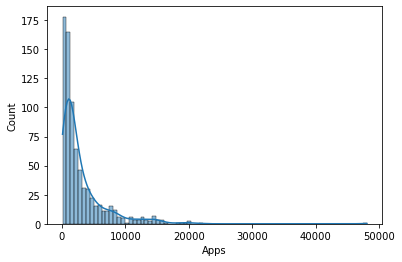

BoxPlot of Apps
----------------------------------------------------------------------------


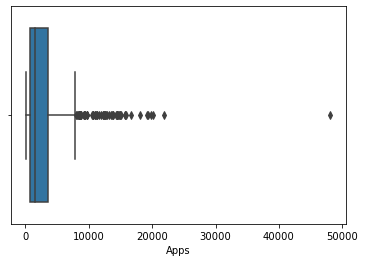

Description of Accept
----------------------------------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 

Distribution of Accept
----------------------------------------------------------------------------


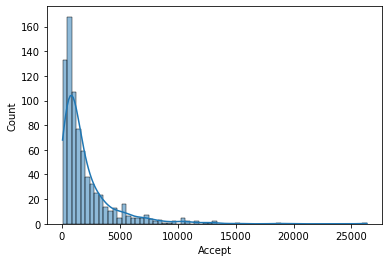

BoxPlot of Accept
----------------------------------------------------------------------------


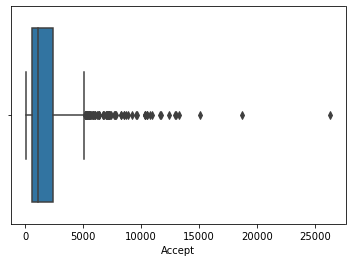

Description of Enroll
----------------------------------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 

Distribution of Enroll
----------------------------------------------------------------------------


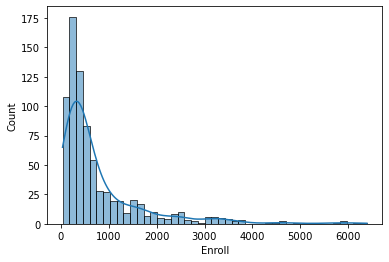

BoxPlot of Enroll
----------------------------------------------------------------------------


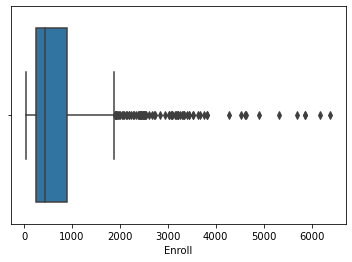

Description of Top10perc
----------------------------------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 

Distribution of Top10perc
----------------------------------------------------------------------------


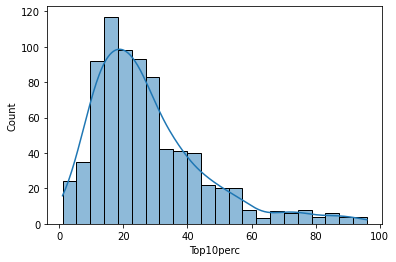

BoxPlot of Top10perc
----------------------------------------------------------------------------


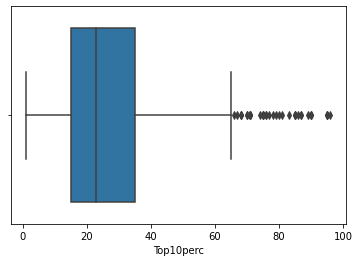

Description of Top25perc
----------------------------------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 

Distribution of Top25perc
----------------------------------------------------------------------------


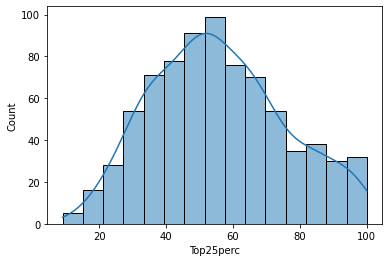

BoxPlot of Top25perc
----------------------------------------------------------------------------


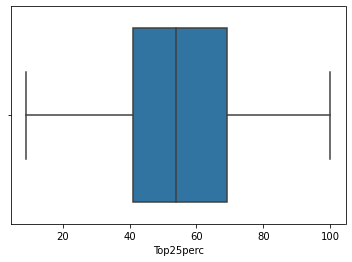

Description of F_Undergrad
----------------------------------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F_Undergrad, dtype: float64 

Distribution of F_Undergrad
----------------------------------------------------------------------------


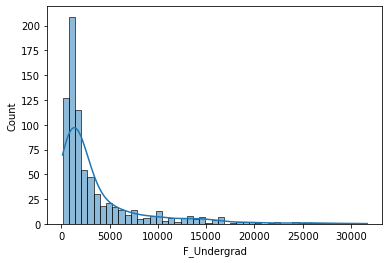

BoxPlot of F_Undergrad
----------------------------------------------------------------------------


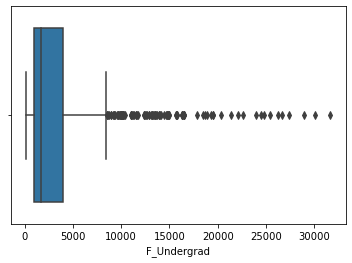

Description of P_Undergrad
----------------------------------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P_Undergrad, dtype: float64 

Distribution of P_Undergrad
----------------------------------------------------------------------------


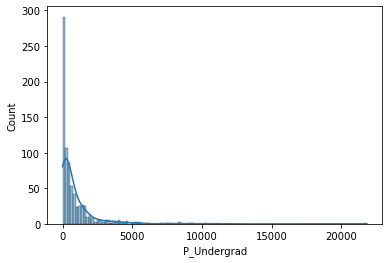

BoxPlot of P_Undergrad
----------------------------------------------------------------------------


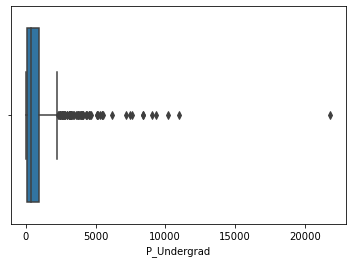

Description of Outstate
----------------------------------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 

Distribution of Outstate
----------------------------------------------------------------------------


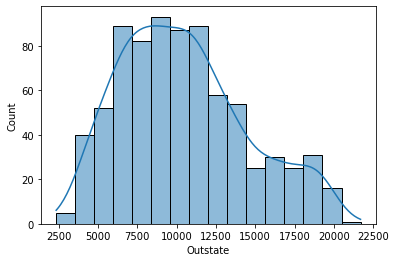

BoxPlot of Outstate
----------------------------------------------------------------------------


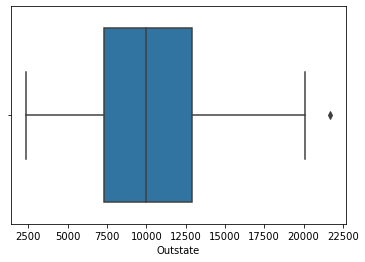

Description of Room_Board
----------------------------------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room_Board, dtype: float64 

Distribution of Room_Board
----------------------------------------------------------------------------


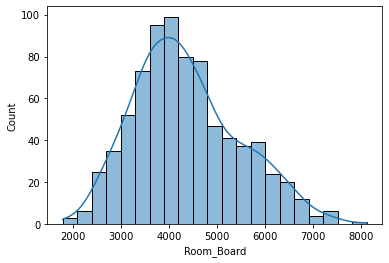

BoxPlot of Room_Board
----------------------------------------------------------------------------


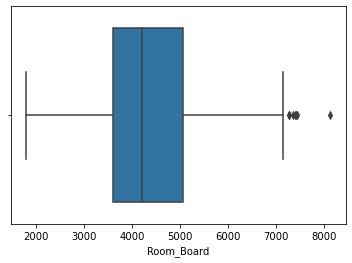

Description of Books
----------------------------------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 

Distribution of Books
----------------------------------------------------------------------------


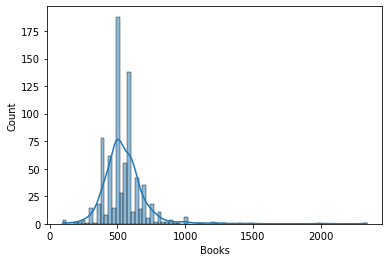

BoxPlot of Books
----------------------------------------------------------------------------


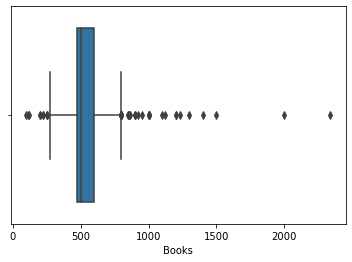

Description of Personal
----------------------------------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 

Distribution of Personal
----------------------------------------------------------------------------


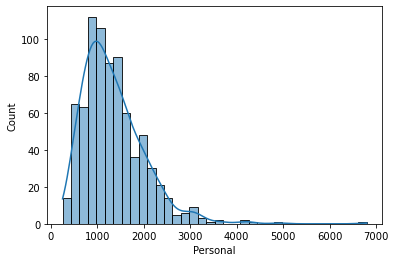

BoxPlot of Personal
----------------------------------------------------------------------------


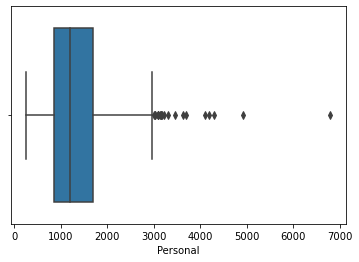

Description of PhD
----------------------------------------------------------------------------
count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64 

Distribution of PhD
----------------------------------------------------------------------------


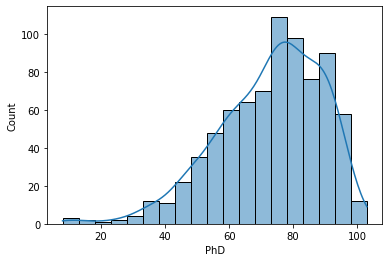

BoxPlot of PhD
----------------------------------------------------------------------------


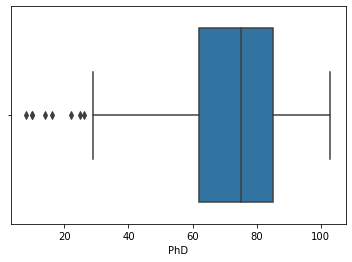

Description of Terminal
----------------------------------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 

Distribution of Terminal
----------------------------------------------------------------------------


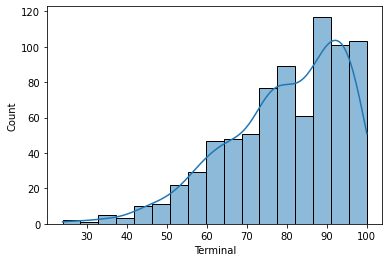

BoxPlot of Terminal
----------------------------------------------------------------------------


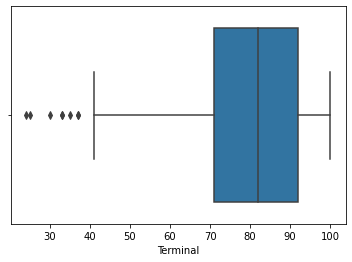

Description of SF_Ratio
----------------------------------------------------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: SF_Ratio, dtype: float64 

Distribution of SF_Ratio
----------------------------------------------------------------------------


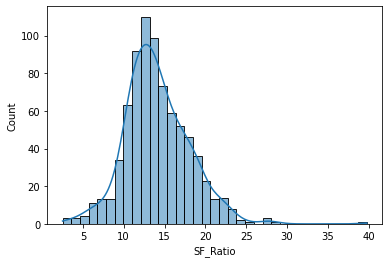

BoxPlot of SF_Ratio
----------------------------------------------------------------------------


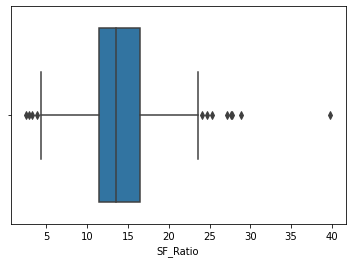

Description of perc_alumni
----------------------------------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc_alumni, dtype: float64 

Distribution of perc_alumni
----------------------------------------------------------------------------


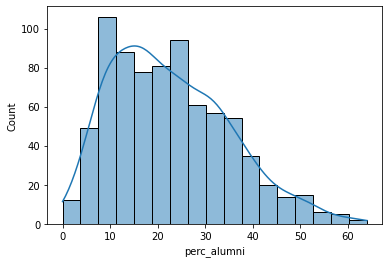

BoxPlot of perc_alumni
----------------------------------------------------------------------------


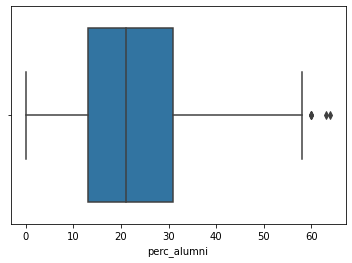

Description of Expend
----------------------------------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 

Distribution of Expend
----------------------------------------------------------------------------


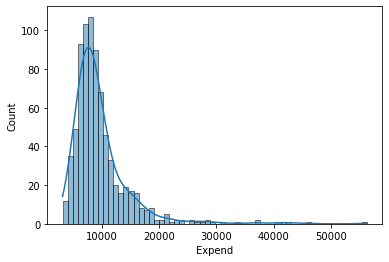

BoxPlot of Expend
----------------------------------------------------------------------------


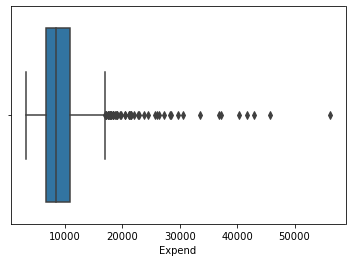

Description of Grad_Rate
----------------------------------------------------------------------------
count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad_Rate, dtype: float64 

Distribution of Grad_Rate
----------------------------------------------------------------------------


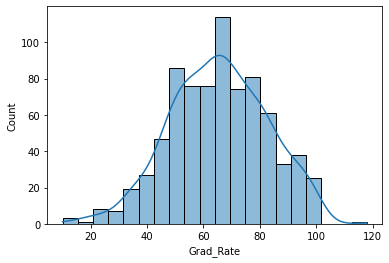

BoxPlot of Grad_Rate
----------------------------------------------------------------------------


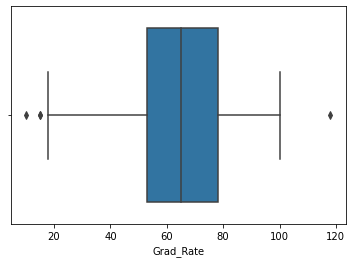

In [45]:
for x in listcolumns:
    univaranalysis(x)

<Figure size 3600x3600 with 0 Axes>

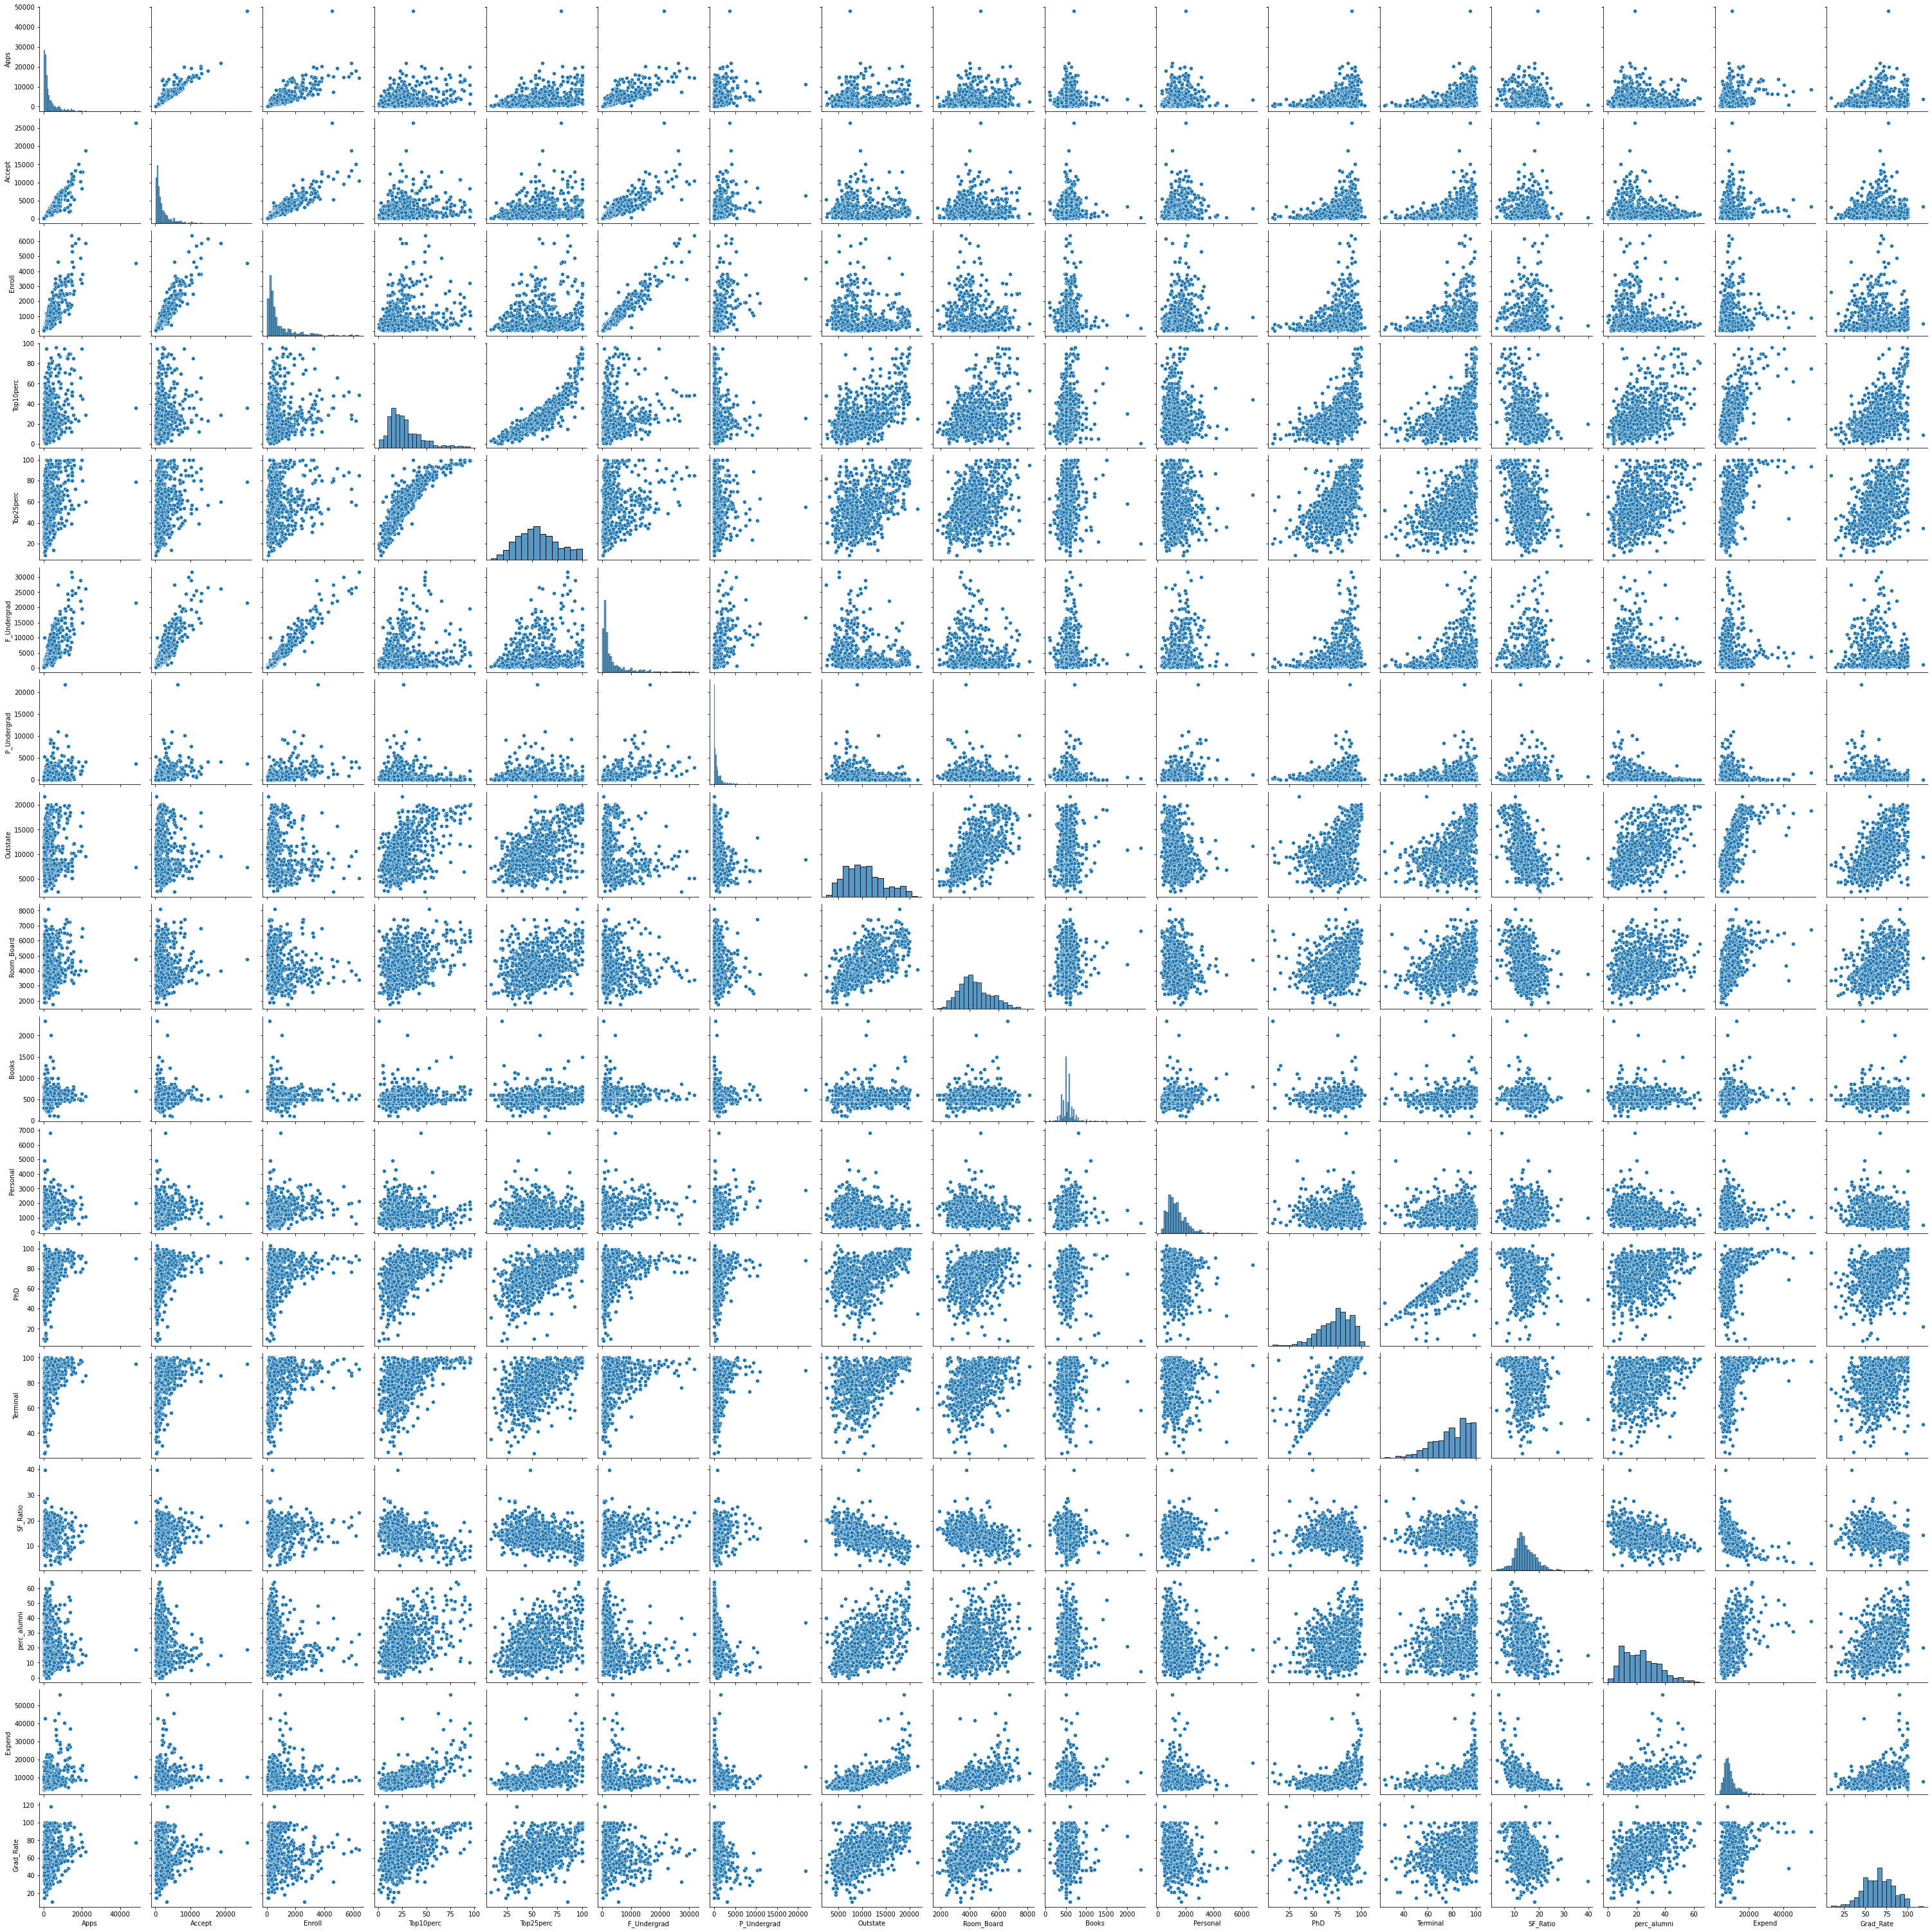

In [30]:
plt.figure(figsize=(50,50))
sns.pairplot(df1);

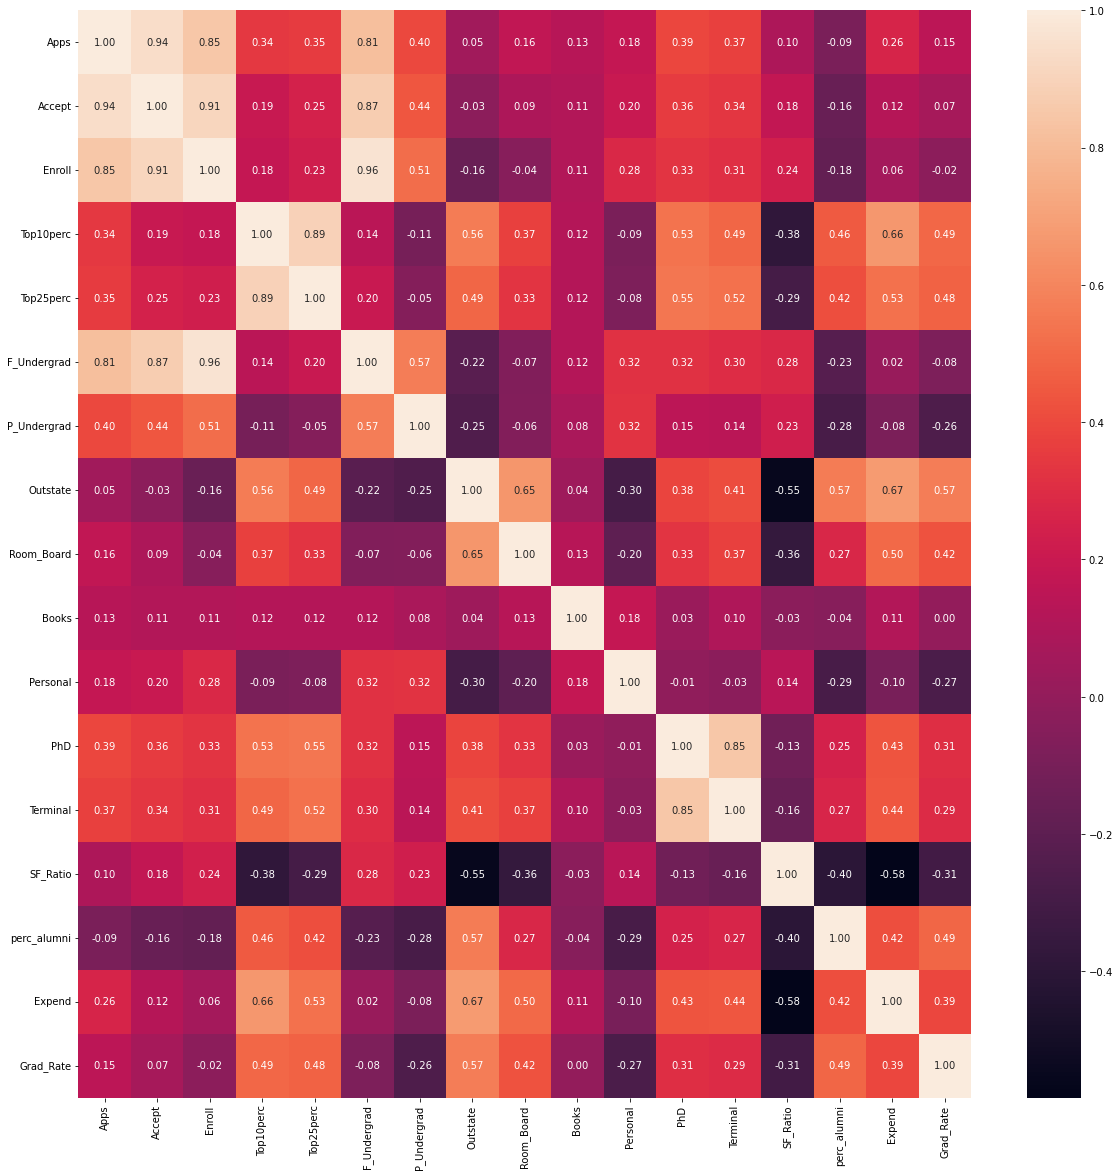

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,fmt=".2f");

In [75]:
df1copy = df1.copy()
df1copy['Acceptance Ratio']= round(df1copy['Accept']/df1copy['Apps'] * 100,  2)

In [76]:
df1copy.groupby('Names')['Acceptance Ratio'].max().sort_values(ascending=False)

Names
Wayne State College                 100.00
Mayville State University           100.00
University of Wisconsin-Superior    100.00
Southwest Baptist University        100.00
Emporia State University            100.00
                                     ...  
Brown University                     25.73
Amherst College                      23.06
Yale University                      22.91
Harvard University                   15.61
Princeton University                 15.45
Name: Acceptance Ratio, Length: 777, dtype: float64

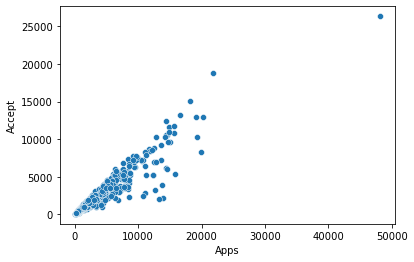

In [78]:
sns.scatterplot(x = 'Apps', y= 'Accept',data=df1);

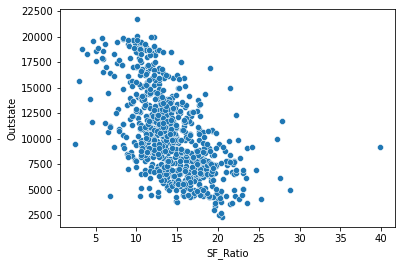

In [48]:
sns.scatterplot(x = 'SF_Ratio', y= 'Outstate',data=df1);

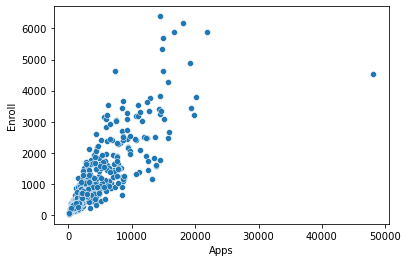

In [79]:
sns.scatterplot(x = 'Apps', y= 'Enroll',data=df1);

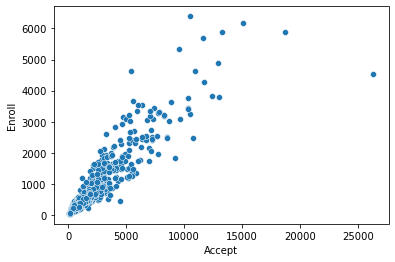

In [80]:
sns.scatterplot(x = 'Accept', y= 'Enroll',data=df1);

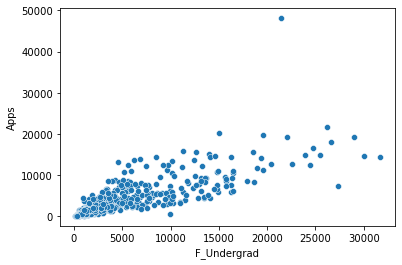

In [81]:
sns.scatterplot(x = 'F_Undergrad', y= 'Apps',data=df1);

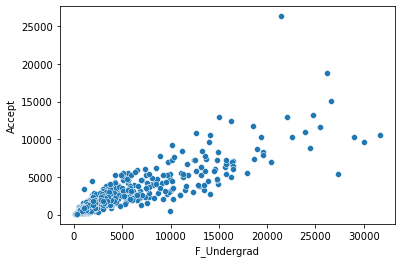

In [82]:
sns.scatterplot(x = 'F_Undergrad', y= 'Accept',data=df1);

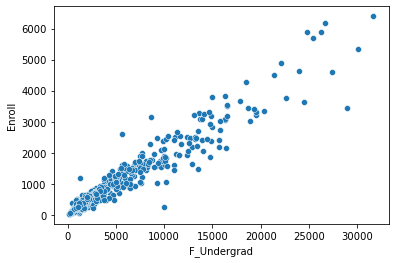

In [83]:
sns.scatterplot(x = 'F_Undergrad', y= 'Enroll',data=df1);

In [84]:
print('The variances of the numeric variables are given below')
df1.var()

The variances of the numeric variables are given below


C:\Users\ankit\AppData\Local\Temp\ipykernel_11756\2774038933.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.var()


Apps           1.497846e+07
Accept         6.007960e+06
Enroll         8.633684e+05
Top10perc      3.111825e+02
Top25perc      3.922292e+02
F_Undergrad    2.352658e+07
P_Undergrad    2.317799e+06
Outstate       1.618466e+07
Room_Board     1.202743e+06
Books          2.725978e+04
Personal       4.584258e+05
PhD            2.654282e+02
Terminal       2.167478e+02
SF_Ratio       1.566853e+01
perc_alumni    1.535567e+02
Expend         2.726687e+07
Grad_Rate      2.915125e+02
dtype: float64

####  2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [4]:
#drop Names column
df2= df1.drop(['Names'], axis=1)
df2.head(10)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   
5   587     479     158         38         62          678           41   
6   353     340     103         17         45          416          230   
7  1899    1720     489         37         68         1594           32   
8  1038     839     227         30         63          973          306   
9   582     498     172         21         44          799           78   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   
5     13500        3335    500       675   67        73        9.4   
6     13290        5720    500      1500   90        93       11.5   
7     13868        4826    450       850   89       100       13.7   
8     15595        4400    300       500   79        84       11.3   
9     10468        3380    660      1800   40        41       11.5   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15  
5           11    9727         55  
6           26    8861         63  
7           37   11487         73  
8           23   11644         80  
9           15    8991         52

In [6]:
#scaling & standardising the data
from scipy.stats import zscore
df3= df2.apply(zscore)
df3.head(10)

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   
5 -0.624307 -0.628611 -0.669812   0.592287   0.313426    -0.623421   
6 -0.684808 -0.685356 -0.729043  -0.598931  -0.545505    -0.677472   
7 -0.285088 -0.121984 -0.313353   0.535563   0.616579    -0.434450   
8 -0.507700 -0.481644 -0.595505   0.138490   0.363952    -0.562562   
9 -0.625600 -0.620854 -0.654735  -0.372032  -0.596031    -0.598459   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   
5    -0.535212  0.760947   -0.932970 -0.299280 -0.983753 -0.346878 -0.455567   
6    -0.410988  0.708713    1.243144 -0.299280  0.235515  1.062639  0.903786   
7    -0.541127  0.852479    0.427443 -0.602312 -0.725120  1.001356  1.379560   
8    -0.361036  1.282036    0.038754 -1.511408 -1.242385  0.388522  0.292077   
9    -0.510893  0.006798   -0.891911  0.670422  0.678885 -2.001529 -2.630532   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613  
5  -1.185526    -0.948325  0.012806  -0.609514  
6  -0.654660     0.262933 -0.153145  -0.143495  
7  -0.098515     1.151188  0.350074   0.439030  
8  -0.705218     0.020681  0.380160   0.846798  
9  -0.654660    -0.625323 -0.128233  -0.784272

In [94]:
#standard deviation of scaled data=1
df3.std()

Apps           1.000644
Accept         1.000644
Enroll         1.000644
Top10perc      1.000644
Top25perc      1.000644
F_Undergrad    1.000644
P_Undergrad    1.000644
Outstate       1.000644
Room_Board     1.000644
Books          1.000644
Personal       1.000644
PhD            1.000644
Terminal       1.000644
SF_Ratio       1.000644
perc_alumni    1.000644
Expend         1.000644
Grad_Rate      1.000644
dtype: float64

In [95]:
#mean of scaled data=0
df3.mean()

Apps           6.355797e-17
Accept         6.774575e-17
Enroll        -5.249269e-17
Top10perc     -2.753232e-17
Top25perc     -1.546739e-16
F_Undergrad   -1.661405e-16
P_Undergrad   -3.029180e-17
Outstate       6.515595e-17
Room_Board     3.570717e-16
Books         -2.192583e-16
Personal       4.765243e-17
PhD            1.767855e-16
Terminal      -4.481615e-16
SF_Ratio      -2.057556e-17
perc_alumni   -6.022638e-17
Expend         1.213101e-16
Grad_Rate     -3.349244e-16
dtype: float64

#### 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

In [97]:
corrMatrix= df3.corr()
print(corrMatrix)

                 Apps    Accept    Enroll  Top10perc  Top25perc  F_Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F_Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P_Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room_Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.392980  0.357938  0.33348

In [7]:
#PCA
#Step 1 - Create covariance matrix
cov_matrix = np.cov(df3.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441  

#### 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

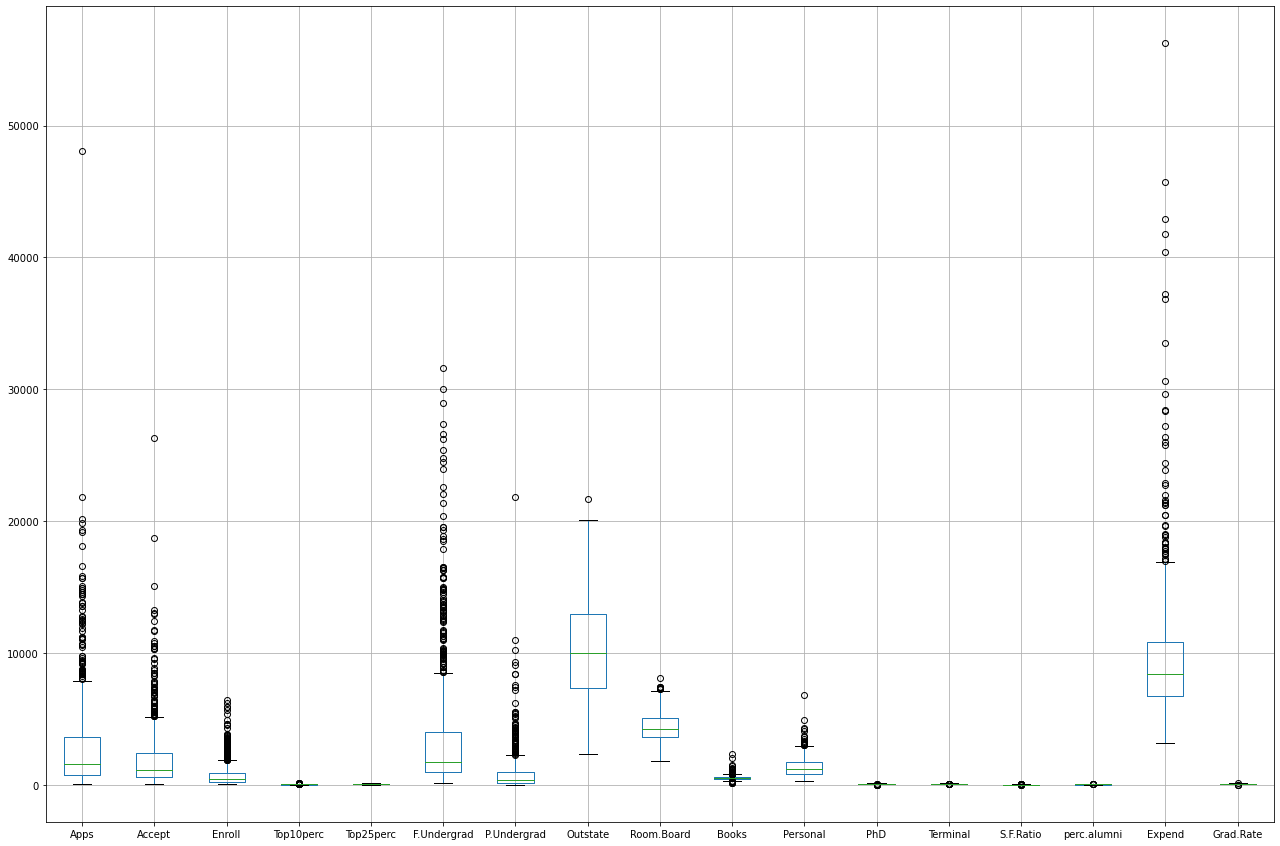

In [9]:
df2.boxplot(figsize=(22,15));

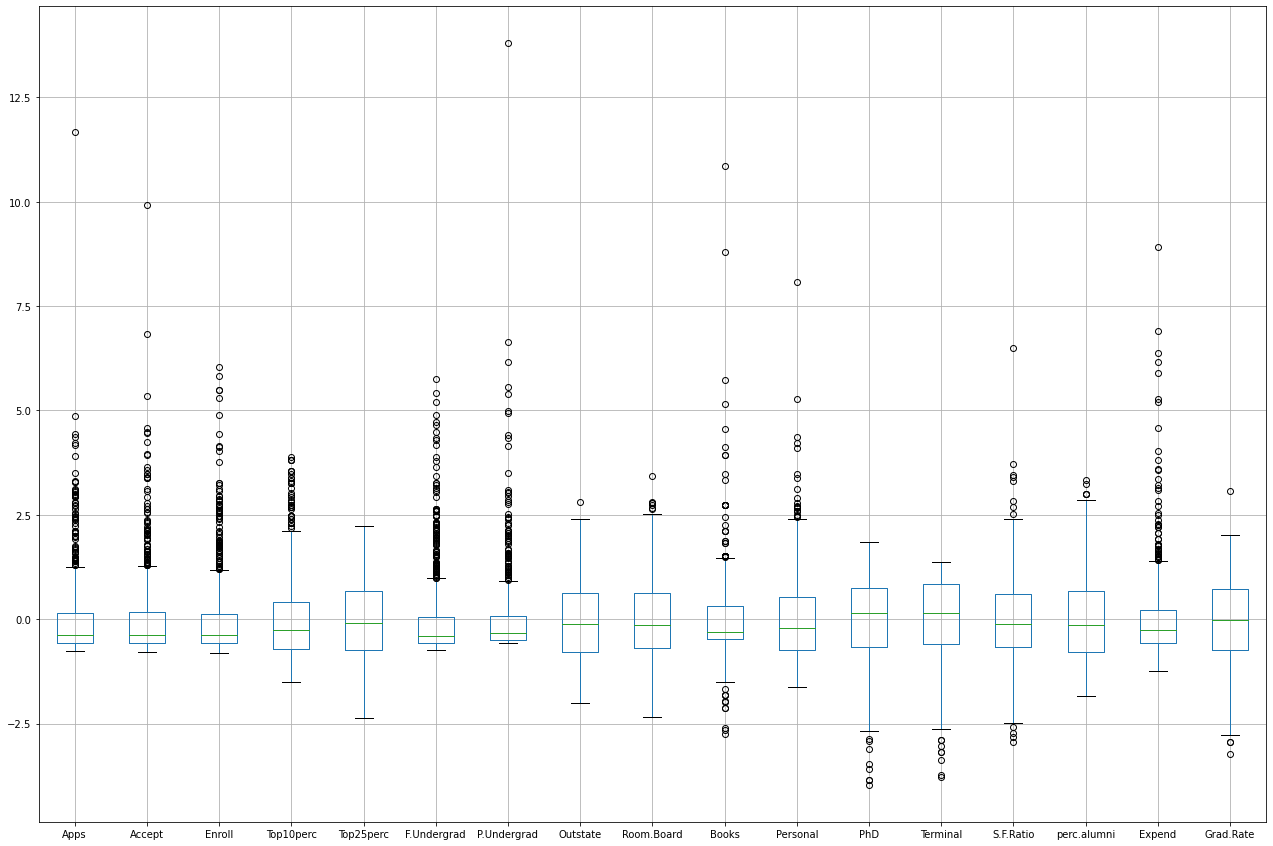

In [10]:
df3.boxplot(figsize=(22,15));

In [100]:
df3.describe()

Apps        Accept        Enroll     Top10perc     Top25perc  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean   6.355797e-17  6.774575e-17 -5.249269e-17 -2.753232e-17 -1.546739e-16   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -7.551337e-01 -7.947645e-01 -8.022728e-01 -1.506526e+00 -2.364419e+00   
25%   -5.754408e-01 -5.775805e-01 -5.793514e-01 -7.123803e-01 -7.476067e-01   
50%   -3.732540e-01 -3.710108e-01 -3.725836e-01 -2.585828e-01 -9.077663e-02   
75%    1.609122e-01  1.654173e-01  1.314128e-01  4.221134e-01  6.671042e-01   
max    1.165867e+01  9.924816e+00  6.043678e+00  3.882319e+00  2.233391e+00   

        F_Undergrad   P_Undergrad      Outstate    Room_Board         Books  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean  -1.661405e-16 -3.029180e-17  6.515595e-17  3.570717e-16 -2.192583e-16   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -7.346169e-01 -5.615022e-01 -2.014878e+00 -2.351778e+00 -2.747779e+00   
25%   -5.586426e-01 -4.997191e-01 -7.762035e-01 -6.939170e-01 -4.810994e-01   
50%   -4.111378e-01 -3.301442e-01 -1.120949e-01 -1.437297e-01 -2.992802e-01   
75%    6.294077e-02  7.341765e-02  6.179271e-01  6.318245e-01  3.067838e-01   
max    5.764674e+00  1.378992e+01  2.800531e+00  3.436593e+00  1.085230e+01   

           Personal           PhD      Terminal      SF_Ratio   perc_alumni  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean   4.765243e-17  1.767855e-16 -4.481615e-16 -2.057556e-17 -6.022638e-17   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -1.611860e+00 -3.969185e+00 -3.785982e+00 -2.929799e+00 -1.836580e+00   
25%   -7.251203e-01 -6.525326e-01 -5.915023e-01 -6.546598e-01 -7.868237e-01   
50%   -2.078552e-01  1.459207e-01  1.561419e-01 -1.237939e-01 -1.408197e-01   
75%    5.310950e-01  7.601155e-01  8.358184e-01  6.093067e-01  6.666852e-01   
max    8.068387e+00  1.681408e+00  1.379560e+00  6.499390e+00  3.331452e+00   

             Expend     Grad_Rate  
count  7.770000e+02  7.770000e+02  
mean   1.213101e-16 -3.349244e-16  
std    1.000644e+00  1.000644e+00  
min   -1.240641e+00 -3.246553e+00  
25%   -5.574826e-01 -7.264428e-01  
50%   -2.458933e-01 -2.315626e-02  
75%    2.241735e-01  7.387375e-01  
max    8.924721e+00  2.028096e+00

#### 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

#### 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [11]:
#Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n', eig_vals)
print('\n')
print('Eigen Vectors \n', eig_vecs)


 Eigen Values 
 [5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]


Eigen Vectors 
 [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.93988

In [103]:
tot= sum(eig_vals)
var_exp = [(i/tot) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0988744   58.44246116  65.34259565  71.20525863  76.69617559
  81.67414057  85.23346016  88.68686349  91.80133169  94.17208083
  96.01178946  97.30603027  98.29167258  99.13175814  99.64913029
  99.86482309 100.        ]


In [105]:
var_exp

[32.09887440472292,
 26.343586756264354,
 6.9001344932076085,
 5.862662971496296,
 5.490916965786844,
 4.977964976700809,
 3.5593195939891014,
 3.453403325686478,
 3.11446820631807,
 2.3707491311198767,
 1.8397086375846146,
 1.2942408033333521,
 0.9856423126916435,
 0.8400855603042356,
 0.5173721499515651,
 0.21569280484363468,
 0.13517690599857068]

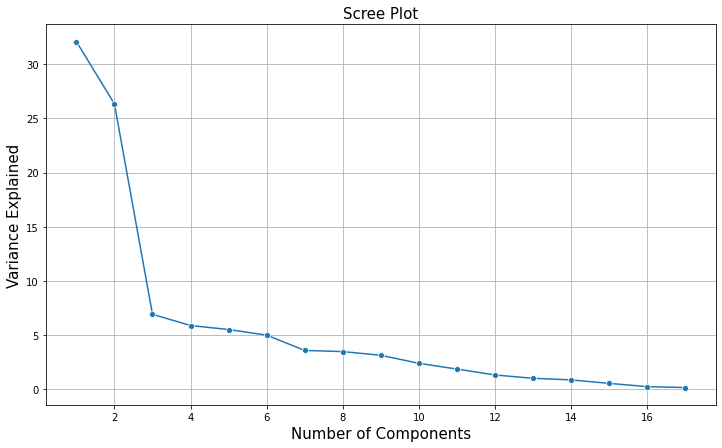

In [104]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [106]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
#NOTE - we are generating only 6 PCA dimensions (dimensionality reduction from 17 to 6)
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(df3)
df_pca.transpose() # Component output

array([[-1.59178367e+00, -2.19726733e+00, -1.43106151e+00, ...,
        -7.35654959e-01,  7.92729370e+00, -4.57851961e-01],
       [ 7.62095222e-01, -5.82570548e-01, -1.09617695e+00, ...,
        -7.85324092e-02, -2.04892376e+00,  3.62098269e-01],
       [-1.16125321e-01,  2.31716748e+00, -4.34091528e-01, ...,
         1.60923954e-03,  2.08175826e+00, -1.33525267e+00],
       [-9.49497305e-01,  3.59195182e+00,  7.02472205e-01, ...,
         7.26782076e-02,  8.43396721e-01, -1.78424190e-01],
       [-7.24679783e-01,  9.84844680e-01, -3.79119636e-01, ...,
        -5.17643471e-01, -9.60284109e-01, -1.13325642e+00],
       [-3.13274583e-01, -1.26557398e-01, -9.47274775e-01, ...,
         4.72161888e-01, -2.06846796e+00,  8.32020244e-01]])

In [107]:
pca.explained_variance_

array([5.46384062, 4.4841809 , 1.17453449, 0.99793705, 0.93465879,
       0.84734458])

In [108]:
#Loading of each feature on the components
pca.components_

array([[ 2.47532537e-01,  2.06299756e-01,  1.75138842e-01,
         3.53990557e-01,  3.43702467e-01,  1.53527590e-01,
         2.57859287e-02,  2.94965994e-01,  2.48896885e-01,
         6.42827785e-02, -4.25981738e-02,  3.19579232e-01,
         3.16776477e-01, -1.77164491e-01,  2.05418014e-01,
         3.18605544e-01,  2.55626868e-01],
       [ 3.32426877e-01,  3.72875058e-01,  4.04250640e-01,
        -8.15077765e-02, -4.39140881e-02,  4.18089297e-01,
         3.15119134e-01, -2.48748173e-01, -1.36927922e-01,
         5.66066526e-02,  2.19634151e-01,  5.88540448e-02,
         4.70008357e-02,  2.46076655e-01, -2.46023579e-01,
        -1.30727369e-01, -1.68686285e-01],
       [-5.96776944e-02, -9.77593933e-02, -8.13575785e-02,
         3.42794388e-02, -2.55085711e-02, -6.05628429e-02,
         1.37966830e-01,  4.81491219e-02,  1.52143503e-01,
         6.79693620e-01,  4.95300078e-01, -1.31903120e-01,
        -7.09715605e-02, -2.91240091e-01, -1.47090056e-01,
         2.27918828e-01, -2.0

In [109]:
pca.explained_variance_ratio_

array([0.32098874, 0.26343587, 0.06900134, 0.05862663, 0.05490917,
       0.04977965])

In [110]:
#create a dataframe of component loading against each field and identify the pattern
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df3))
df_pca_loading.shape

(6, 17)

In [111]:
df_pca_loading.head(6)

Apps    Accept    Enroll  Top10perc  Top25perc  F_Undergrad  \
0  0.247533  0.206300  0.175139   0.353991   0.343702     0.153528   
1  0.332427  0.372875  0.404251  -0.081508  -0.043914     0.418089   
2 -0.059678 -0.097759 -0.081358   0.034279  -0.025509    -0.060563   
3  0.285097  0.271788  0.163457  -0.055180  -0.115855     0.101292   
4  0.000170  0.050617 -0.058798  -0.394019  -0.423913    -0.045408   
5 -0.012281  0.011277 -0.040120  -0.054194   0.030869    -0.041727   

   P_Undergrad  Outstate  Room_Board     Books  Personal       PhD  Terminal  \
0     0.025786  0.294966    0.248897  0.064283 -0.042598  0.319579  0.316776   
1     0.315119 -0.248748   -0.136928  0.056607  0.219634  0.058854  0.047001   
2     0.137967  0.048149    0.152144  0.679694  0.495300 -0.131903 -0.070972   
3    -0.158951  0.136572    0.191576  0.071380 -0.249033 -0.529195 -0.518145   
4     0.306058  0.220140    0.556677 -0.131995 -0.217224  0.150814  0.214616   
5    -0.193339 -0.026773    0.167220  0.640262 -0.337698  0.083092  0.149282   

   SF_Ratio  perc_alumni    Expend  Grad_Rate  
0 -0.177164     0.205418  0.318606   0.255627  
1  0.246077    -0.246024 -0.130727  -0.168686  
2 -0.291240    -0.147090  0.227919  -0.205241  
3 -0.168468     0.016115  0.086067   0.243113  
4 -0.077059    -0.215815  0.074993  -0.115718  
5  0.485844    -0.047150 -0.297458   0.215657

In [112]:
pca.components_[0]

array([ 0.24753254,  0.20629976,  0.17513884,  0.35399056,  0.34370247,
        0.15352759,  0.02578593,  0.29496599,  0.24889688,  0.06428278,
       -0.04259817,  0.31957923,  0.31677648, -0.17716449,  0.20541801,
        0.31860554,  0.25562687])

#### 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

The explicit form of first PC is as below:

$PC_1$= 0.25\*Apps + 0.21\*Accept + 0.18\*Enroll + 0.35\*Top10perc + 0.34\*Top25perc + 0.15\*F.Undergrad+ 0.03\*P.Undergrad + 0.29\*Outstate + 0.25\*Room.Board + 0.06\*Books + (-0.04)\*Personal + 0.32\*PhD +0.32\*Terminal + (-0.18)\*S.F.Ratio + 0.21\*perc.alumni + 0.32\*Expend + 0.25\*Grad.Rate


#### 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

The common way of selecting the Principal Components to be used is to set a threshold of explained variance, such as 80%, and then select the number of components that generate a cumulative sum of explained variance as close as possible of that threshold. In order to choose the principal components, it is customary to first set a threshold for explained variance, such as 80%, and then choose the number of components that produce a cumulative sum of explained variance that is as close to that threshold as is possible.

The Eigenvectors determine the directions of the new attribute space, and the eigenvalues determine their magnitude. As can be seen in the PCA, the components of the eigen vectors determine the PCs.

#### 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

Let's identify which features have maximum loading across the components.                                                         
We will first plot the component loading on a heatmap.                                                                          
For each feature, we find the maximum loading value across the components and mark the same with help of rectangular box.           
Features marked with rectangular red box are the one having maximum loading on the respective component. We consider these marked features to decide the context that the component represents.

In [113]:
from matplotlib.patches import Rectangle

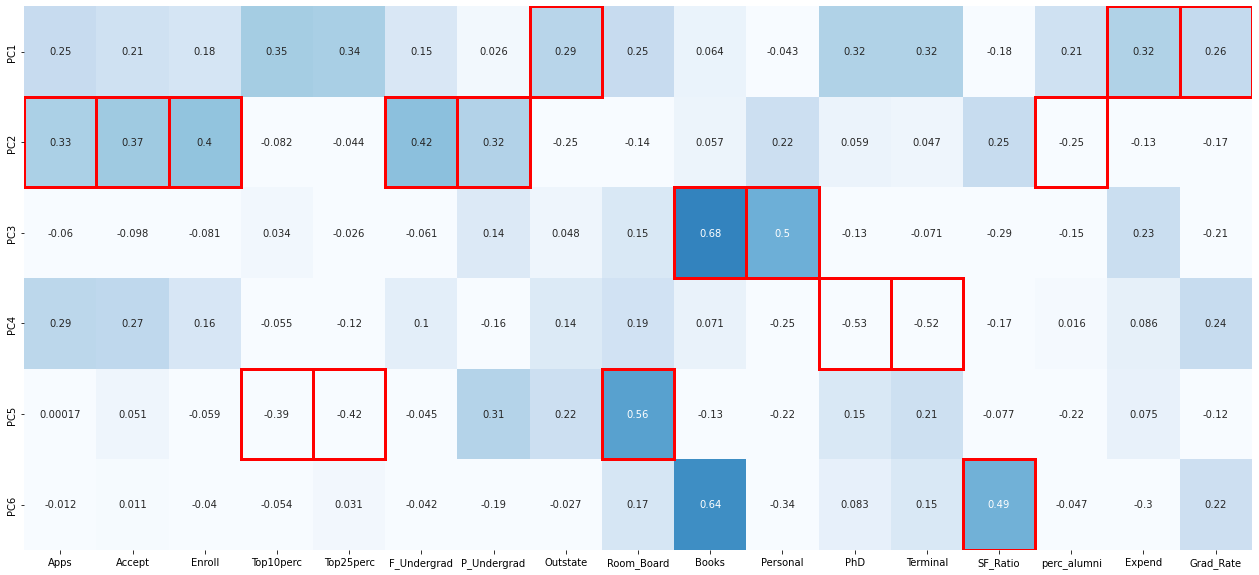

In [114]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5','PC6'])
column_max = df_pca_loading.abs().idxmax(axis=0)
for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))